# Distinguish your Own digits
> Distinguish between 3 and 8 handwritten digits

- author:Praneetha

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

incase of using mnist for the first time use this command to install mnist from the notebook - `!pip install mnist`
Incase to get it from command line use `pip install mnist`


In [3]:
import mnist

In [4]:
train_images = mnist.train_images() 
train_labels = mnist.train_labels()

In [5]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [6]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [7]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

8


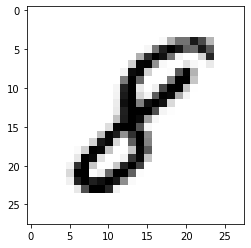

In [8]:
image_index = 7777 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [9]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]


In [10]:
X_train = X_train/255. #normalising the pixel values in the 0 to 1 range
X_test = X_test/255.

In [11]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)        #y = 0 for 8 and y = 1 for 3

In [12]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

In [13]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

Building a classifier from kudzu, And Kudzu is a library made to create a neural network models and it is included in the' _notebooks' folder of this github repo 

In [14]:
from kudzu.model import Model
from kudzu.layer import Affine, Sigmoid, Relu
from kudzu.loss import MSE
from kudzu.optim import GD
from kudzu.data import Data, Dataloader, Sampler
from kudzu.train import Learner

In [15]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 200
config.bs = 50

In [16]:
data = Data(X_train,y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle = True)
dl = Dataloader(data,sampler)

In [17]:
train_x = X_train
test_x = X_test
train_y = y_train.reshape(-1,1)
test_y = y_test.reshape(-1,1)

In [18]:
layers = [Affine("first",784,100),Relu("first"),Affine("second",100,100),Relu("second"),Affine("third",100,2),Affine("final",2,1),Sigmoid("final")]
model_nn = Model(layers)

xavier
xavier
xavier
xavier


Created a subclass "ClfCallback" of "Callback" class in callbacks.py and import in it

In [19]:
from kudzu.callbacks import ClfCallback


In [20]:
learner_nn = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(learner_nn,config.bs,train_x,test_x,train_y,test_y)
learner_nn.set_callbacks([acc_nn])

In [21]:
learner_nn.train_loop(dl)

Epoch 0 Loss 0.23582396458895544
train accuracy 0.7413620430645969, test accuracy 0.7288306451612904
Epoch 10 Loss 0.09108502028529422
train accuracy 0.9236354531797697, test accuracy 0.9304435483870968
Epoch 20 Loss 0.05567158803229141
train accuracy 0.943832415289601, test accuracy 0.9551411290322581
Epoch 30 Loss 0.04400112813864625
train accuracy 0.9520948088799867, test accuracy 0.9627016129032258
Epoch 40 Loss 0.038216054641071806
train accuracy 0.956434651977967, test accuracy 0.9672379032258065
Epoch 50 Loss 0.03466033738593461
train accuracy 0.9592722416958771, test accuracy 0.969758064516129
Epoch 60 Loss 0.0321735311872201
train accuracy 0.9629444166249375, test accuracy 0.9692540322580645
Epoch 70 Loss 0.030290478103185837
train accuracy 0.9648639626105825, test accuracy 0.9707661290322581
Epoch 80 Loss 0.02879993022501743
train accuracy 0.9657820063428476, test accuracy 0.9717741935483871
Epoch 90 Loss 0.02755851889737681
train accuracy 0.9674511767651477, test accuracy 0.

0.00457578715589094

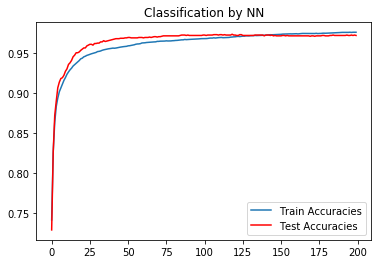

In [22]:
plt.plot(acc_nn.accuracies,label = "Train Accuracies")
plt.plot(acc_nn.test_accuracies,"r-",label = "Test Accuracies")
# plt.ylim(0.6,1)
plt.title("Classification by NN")
plt.legend(loc = "lower right")

In [23]:
#hints taken from TA sessions
#taking upto 3 three layers for visualisation
model_vis = Model(layers[:-2])

The intuition behind these two graphs(one with low alpha and other one with high) is to show the misclassified points of both the classes clearly

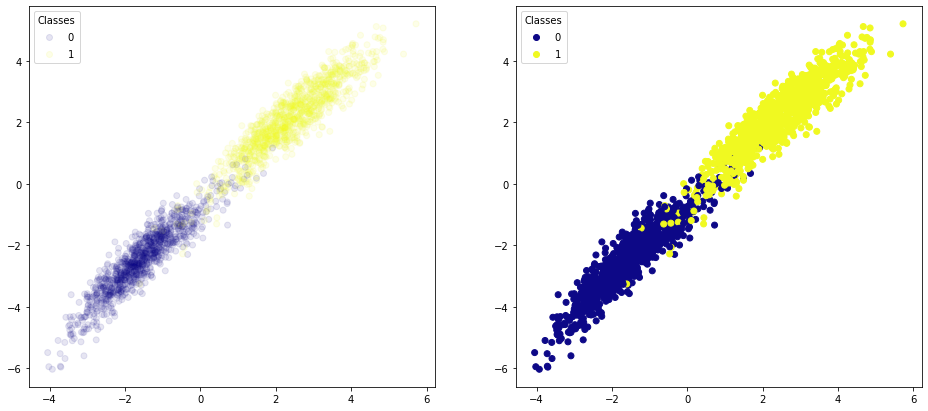

In [26]:
vis = model_vis(test_x)
plt.figure(figsize =(16,7))
plt.subplot(1,2,1)
s1 = plt.scatter(vis[:,0],vis[:,1],alpha = 0.1,c = test_y.ravel(),cmap = 'plasma');
plt.legend(*s1.legend_elements(),loc="upper left", title="Classes")
plt.subplot(1,2,2)
s2 = plt.scatter(vis[:,0],vis[:,1],c = test_y.ravel(),cmap = "plasma");
plt.legend(*s2.legend_elements(),loc="upper left", title="Classes")

In [27]:
#taking last two layers for probabilities
model_prob = Model(layers[-2:])

In [28]:
xgrid = np.linspace(-4, 1, 100) 
ygrid = np.linspace(-7.5, 7.5, 100) 
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100 -> we need to conver them to single arrays 

In [29]:
xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)
# xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

In [30]:
X_interim = np.vstack((xg_interim, yg_interim)) 
X = X_interim.T
# We want a shape of n rows and 2 columns in order to be able to feed this to last affine
# This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100)

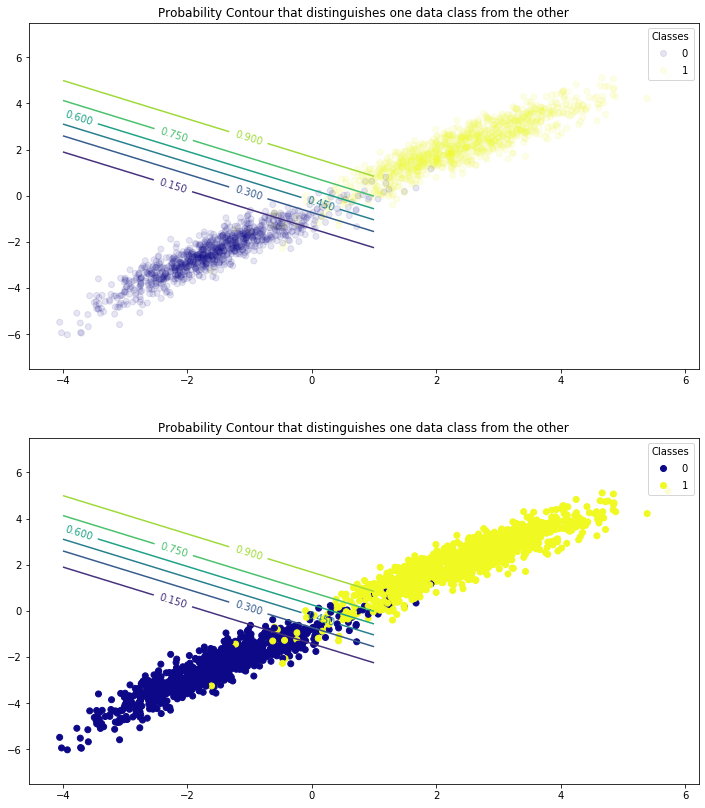

In [31]:
plt.figure(figsize=(12,14))
plt.subplot(2,1,1)
x1 = plt.scatter(vis[:,0], vis[:,1],alpha = 0.1,c = y_test.ravel(),cmap = "plasma")
plt.legend(*x1.legend_elements(),loc="upper right", title="Classes")
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );
plt.title("Probability Contour that distinguishes one data class from the other");
plt.subplot(2,1,2)
x2 = plt.scatter(vis[:,0], vis[:,1], c = y_test.ravel(),cmap = "plasma")
plt.legend(*x2.legend_elements(),loc="upper right", title="Classes")
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );
plt.title("Probability Contour that distinguishes one data class from the other");

In [32]:
layers_logreg = [Affine("first",784,1),Sigmoid("first")]
model_logreg = Model(layers_logreg)

xavier


In [33]:
learner_logreg = Learner(loss, model_logreg, opt, config.num_epochs)
acc_logreg = ClfCallback(learner_logreg,config.bs,train_x,test_x,train_y,test_y)
learner_logreg.set_callbacks([acc_logreg])

In [34]:
learner_logreg.train_loop(dl)

Epoch 0 Loss 0.2395782432683564
train accuracy 0.7069771323652145, test accuracy 0.7132056451612904
Epoch 10 Loss 0.10345716779279428
train accuracy 0.9118678017025539, test accuracy 0.9238911290322581
Epoch 20 Loss 0.07945637023584978
train accuracy 0.928058754798865, test accuracy 0.9420362903225806
Epoch 30 Loss 0.06841436626792223
train accuracy 0.9367384409948256, test accuracy 0.9480846774193549
Epoch 40 Loss 0.061783019287748556
train accuracy 0.942163244867301, test accuracy 0.952116935483871
Epoch 50 Loss 0.05727104758232191
train accuracy 0.9456685027541312, test accuracy 0.9576612903225806
Epoch 60 Loss 0.053958596970267204
train accuracy 0.9492572191620764, test accuracy 0.9591733870967742
Epoch 70 Loss 0.05140230129940749
train accuracy 0.9509263895843766, test accuracy 0.9596774193548387
Epoch 80 Loss 0.049353754627470686
train accuracy 0.9521782674011017, test accuracy 0.9611895161290323
Epoch 90 Loss 0.04766730298747417
train accuracy 0.9528459355700217, test accuracy 0

0.02872783044327909

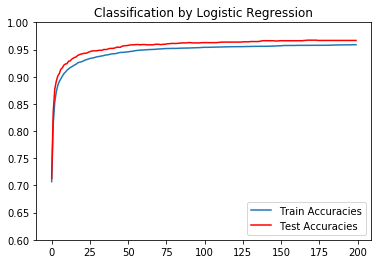

In [35]:
plt.plot(acc_logreg.accuracies,label = "Train Accuracies")
plt.plot(acc_logreg.test_accuracies,"r-",label = "Test Accuracies")
plt.ylim(0.6,1)
plt.title("Classification by Logistic Regression")
plt.legend(loc = "lower right")

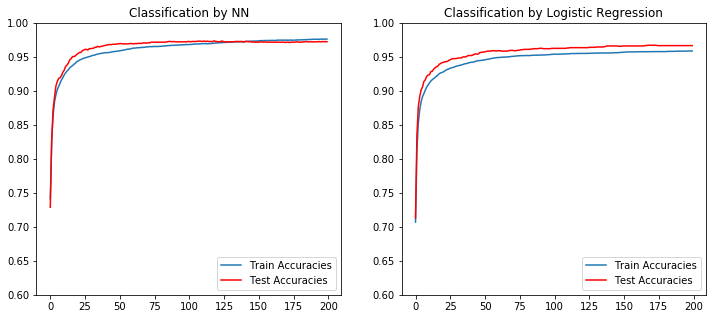

In [36]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(acc_nn.accuracies,label = "Train Accuracies")
plt.plot(acc_nn.test_accuracies,"r-",label = "Test Accuracies")
plt.ylim(0.6,1)
plt.title("Classification by NN")
plt.legend(loc = "lower right")
plt.subplot(1,2,2)
plt.plot(acc_logreg.accuracies,label = "Train Accuracies")
plt.plot(acc_logreg.test_accuracies,"r-",label = "Test Accuracies")
plt.ylim(0.6,1)
plt.title("Classification by Logistic Regression")
plt.legend(loc = "lower right")

From the graphs we can see that NN gives a better accurate classifier than logistic regression but looking at the NN graph,it seems to suffer from overfitting. 

In [37]:
acc_nn.test_accuracies[-1],acc_logreg.test_accuracies[-1]

(0.9722782258064516, 0.9667338709677419)

From the above accuracies we can say that;
- In neural network model, we get around 51 false positives and false negatives out of 1984
- In logistic regression model, we get around 70 false positives and false negatives out of 1984